
 <center> <h1> <b> Pattern Recognition and Machine Learning (EE5610 - EE2802 - AI2000 - AI5000) </b> </h1> </center>

<b> Programming Assignment 01 - KNN : </b> Welcome to the programming assignment (PA) on k-nearest neighbors (KNN) classification. Throughout this PA, you will explore the k-NN algorithm, a versatile and intuitive method for tackling classification and regression challenges. Specifically, this assignment aims to enhance your understanding of the KNN classification algorithm. In this PA, we expect you to implement and experiment with the KNN classifier to understand how variations in 'k' and distance metrics influence classification performance.

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions are not accepted
3. Please DO NOT use any machine learning libraries unless and otherwise specified.



<b> Part(a): Synthetic data generation </b>  

1. Consider four bivariate Gaussians with means at (0,0), (0,1), (1,0), and (1,1), each having a variance of 0.3. Sample 90 points from each Gaussian, resulting in a total of 360 points. Allocate 30 points from each Gaussian for training and 60 points for testing. This results in a total of 120 points for training and 240 points for testing.
2. Create a 2-class training set ($[X_{train}, Y_{train}]$) and a test set ($[X_{test}, Y_{test}]$) by labeling the data sampled from Gaussians with means at (0,0) and (1,1) as class 1, and the data sampled from Gaussians with means at (0,1) and (1,0) as class 2. Assign a label of +1 to class1 and -1 to class2.

4. Visualize both train and test sets using the scatter plot on a 2-D plane. Indicate the data points from class 1 with a green color and those from class 2 with a blue color.

<b> Part(b): KNN Classification - </b> The k-Nearest Neighbors (KNN) classifier algorithm is a straightforward yet powerful tool for classification tasks. The KNN classifier takes the test data point, computes distances to all points in the training set, identifies the 'k' nearest neighbors based on these distances, and assigns the test data to the class that the majority of its neighbors belong to.

<b> Programming questions </b>


1. Write a function called kNNClassify that accepts training data, a test point, and the hyperparameter 'k' as input and returns the label of the test point. Pick a reasonable 'k' for this experiment. Use "kNNClassify" function to generate the labels for the test data generated in part(a) of this PA. Compare the predicted labels with the original labels and calculate the portion of test data points that are correctly classified. In other words, calculate the accuracy of the classifier.
3. Create a visual representation of the predictions by plotting all data points in a 2D plane. Assign green and blue colors to represent class 1 and class 2, respectively. For test data points that are misclassified, assign the color red.
4. Generate and visualize the decision regions of 2D plane that are associated with each class, for a given classifier. Decision regions can be created by classifying all the data points in the 2D grid and assigning class-specific colors to them.

<b> Part(c): Parameter selection: What is good value for k? - </b> One intuitive approach to determine the optimal 'k' is through cross-validation. During cross-validation, a ρ% portion of the training dataset is utilized as the validation dataset, and the model's performance is assessed on this validation set with various 'k' values. Through these cross-validation experiments, we select the 'k' that yields the best performance on the validation data.

<b> Algorithm </b>

1. Perform hold-out cross-validation by setting aside a fraction (ρ of the training set for validation. Note: You may use ρ = 0.3, and repeat the procedure 10 times. The hold-out procedure may be quite unstable.
2. Use a large range of candidate values for k (e.g. k = 1, 3, 5..., 21). Notice odd numbers are considered to avoid ties.
3. Repeat the process for 10 times using a random cross-validation set each time with a ρ = 0.3.
4. Plot the training and validation errors for the different values of k.

<b> Questions </b>

5. How would you now answer the question "what is the best value for k"?
6. How is the value of k affected by ρ (percentage of points held out) and number of repetitions? What does a large number of repetitions provide?
7. Apply the model obtained by cross-validation (i.e., best k) to the test set and check
if there is an improvement on the classification error over the result of Part 2.

<b> Part(d): Influence of training data on KNN classifier - </b>

1. Evaluate the performance as the size of the training set
grows, e.g., n = {200, 400, 1200,...}. How would you choose a good range for k as n changes? What can you say about the stability of the solution? Check by repeating the validation multiple times.
2. Try classifying more difficult datasets, for instance, by increasing the variance or adding noise by randomly flipping the labels on the training set.

<b> Part(e): What is the influence of distance measure on decision regions ? - </b>

1. Evaluate the performance of the KNN classifier with different distance measures such as $l_{1}$, $l_{2}$, etc,.
2. Plot the decision regions of the KNN classifier with different distance measures.
3. Report your observations.  

<b> Part(f): MNIST Digit classification using KNN classifier: </b> : This part will not be graded. However, you are recommended to work on it to get exposure to the practical applications of the KNN classifier.

1. Modify the function kNNClassify to handle multi-class problems and hence design a KNN classifier to classify the images in MNIST dataset as one of the 10 digits. The 28x28 images may be flattened to arrive at a 784 dimensional vector. NOTE: If you had already written a kNNClassify for multi class classification in part1 (b), you are free to use it.
2. The MNIST dataset consists of approximately 70,000 images of handwritten digits. Create training, validation, and test datasets from this entire dataset with the respective proportions of 80%, 10%, and 10%.
3. Empirically determine the most suitable error function, and the corresponding k to maximize the performance on the cross-validation experiments.
4. Apply these values to evaluate the performance on the test dataset.
5. Create a confusion matrix to understand the most confused classes (digits).
6. Suggest alternate ways to improve the performance.



In [18]:
#All imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import random
import math
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

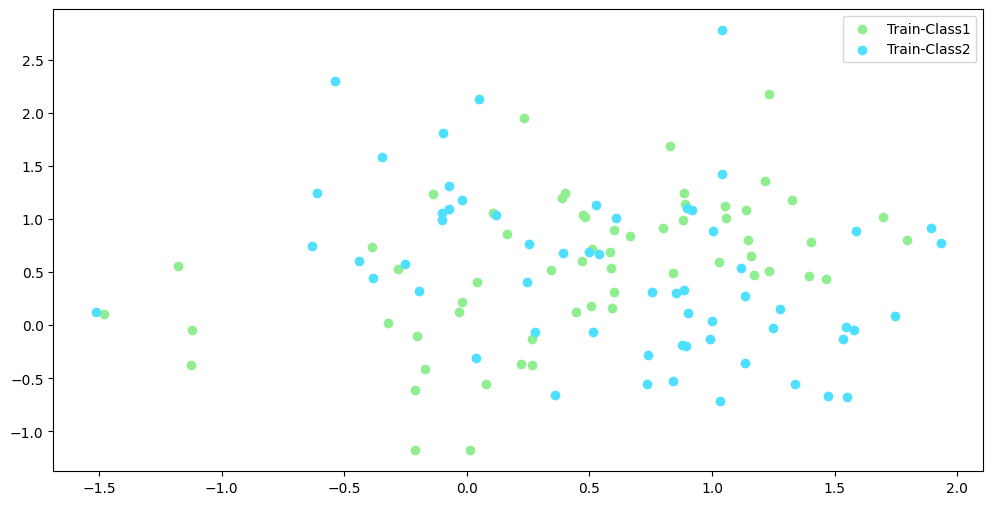

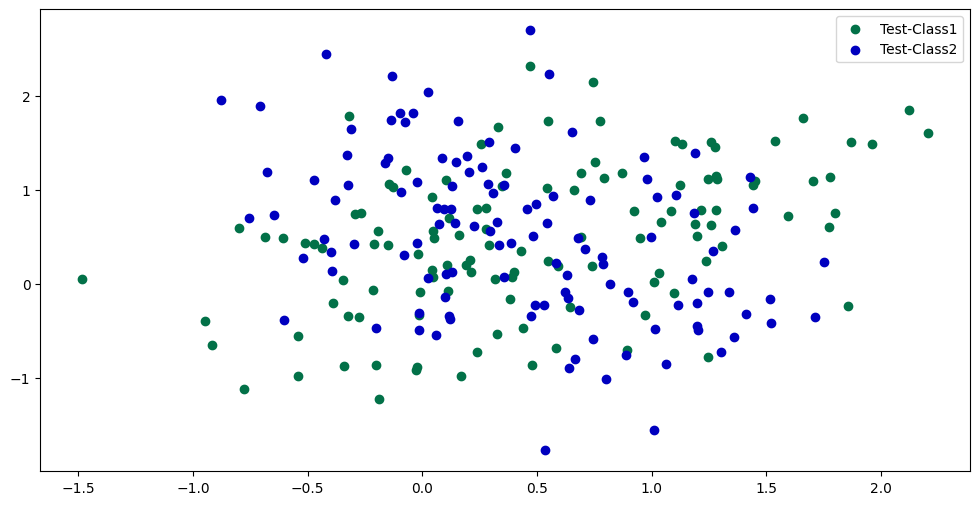

In [17]:
########################################
#Part(a) #Synthetic data generation
########################################
#Define means and covariances
mean1= [0,0]
mean2= [0,1]
mean3= [1,0]
mean4= [1,1]
cov= [[0.3, 0],[0, 0.3]]

#Sample data points from the bivariate Gaussian distribution
#You can use "np.random.multivariate_normal" function to sample the data points from the multivariate Gaussian distribution
#Generate training data
#Generate testing data
X_train = [[],[]]
Y_train = []
X_test = [[], []]
yTest = []

x, y = np.random.multivariate_normal(mean1, cov, 90).T
X_train[0].extend(x[:30])
X_train[1].extend(y[:30])
X_test[0].extend(x[30:])
X_test[1].extend(y[30:])
Y_train.extend([1 for i in range(30)])
yTest.extend([1 for i in range(60)])

x, y = np.random.multivariate_normal(mean2, cov, 90).T
X_train[0].extend(x[:30])
X_train[1].extend(y[:30])
X_test[0].extend(x[30:])
X_test[1].extend(y[30:])
Y_train.extend([-1 for i in range(30)])
yTest.extend([-1 for i in range(60)])

x, y = np.random.multivariate_normal(mean3, cov, 90).T
X_train[0].extend(x[:30])
X_train[1].extend(y[:30])
X_test[0].extend(x[30:])
X_test[1].extend(y[30:])
Y_train.extend([-1 for i in range(30)])
yTest.extend([-1 for i in range(60)])

x, y = np.random.multivariate_normal(mean4, cov, 90).T
X_train[0].extend(x[:30])
X_train[1].extend(y[:30])
X_test[0].extend(x[30:])
X_test[1].extend(y[30:])
Y_train.extend([1 for i in range(30)])
yTest.extend([1 for i in range(60)])

#Visualize the data using plt.scatter() function
plt.figure(figsize = (12,6))
plt.scatter([X_train[0][i] for i in range(len(Y_train)) if Y_train[i] == 1], [X_train[1][i] for i in range(len(Y_train)) if Y_train[i] == 1], c = '#90EE90', label = "Train-Class1")
plt.scatter([X_train[0][i] for i in range(len(Y_train)) if Y_train[i] == -1], [X_train[1][i] for i in range(len(Y_train)) if Y_train[i] == -1], c = '#50e0ff',label = "Train-Class2")
plt.legend()
plt.show()
plt.figure(figsize = (12,6))
plt.scatter([X_test[0][i] for i in range(len(yTest)) if yTest[i] == 1], [X_test[1][i] for i in range(len(yTest)) if yTest[i] == 1], c = '#027148', label = "Test-Class1")
plt.scatter([X_test[0][i] for i in range(len(yTest)) if yTest[i] == -1], [X_test[1][i] for i in range(len(yTest)) if yTest[i] == -1], c = '#0000BF', label = "Test-Class2")
plt.legend()
plt.show()

71.66666666666667


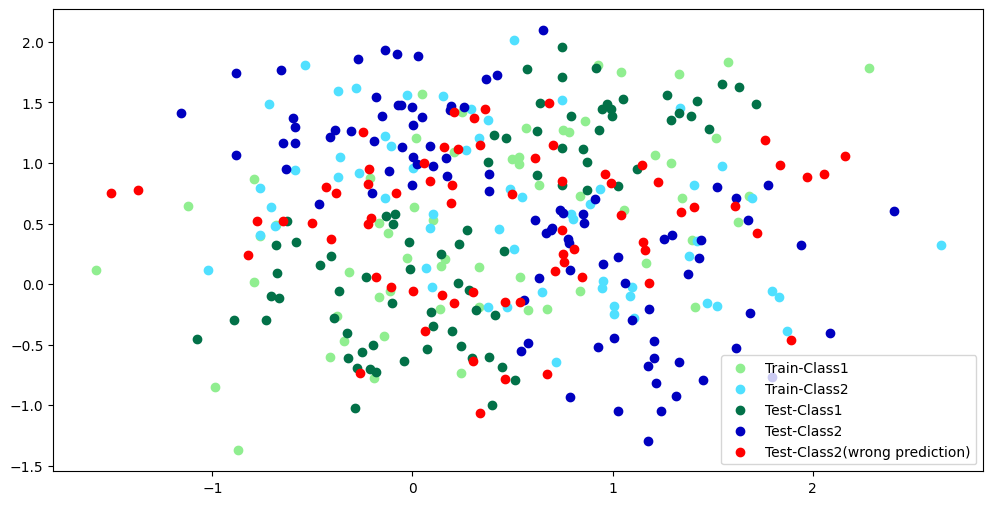

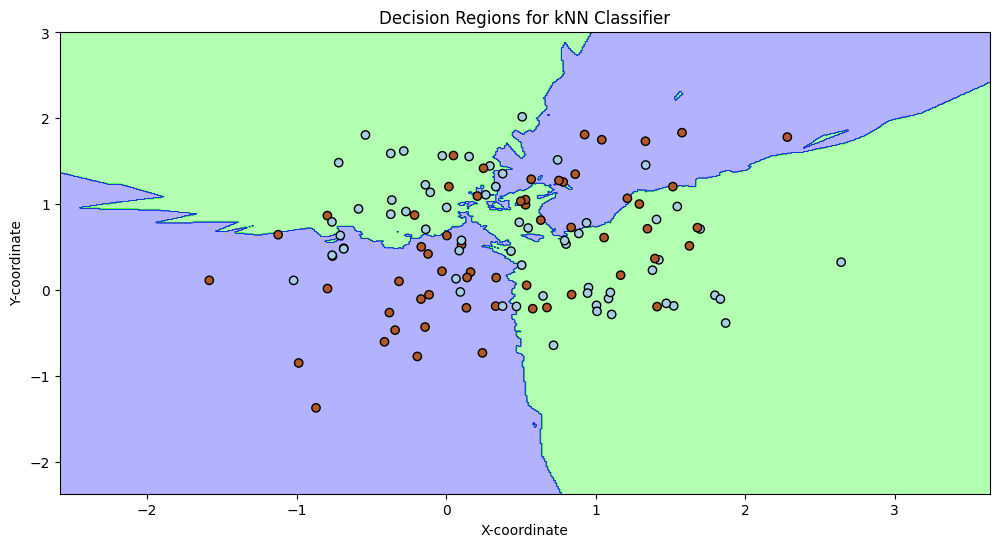

In [3]:
########################################
#Part(b) #KNN classification
########################################
def dis(p, q, d_num):
    p = np.array(p)
    q = np.array(q)
    if(d_num == 2):
        return np.linalg.norm(p-q)
    
    elif(d_num == 1):
        return(np.linalg.norm((p-q), ord=1))
    
    elif(d_num == 3):
        return(max(p-q))
        

#Write "kNNClassify" function
def kNNClassify(X_train,Y_train,X_test,k, d_num):
    pred = []
    for i in range(len(X_test[0])):
        d = []
        kIdx = []
        p = [X_test[0][i], X_test[1][i]]
        for j in range(len(X_train[0])):
            q = [X_train[0][j], X_train[1][j]]
            d.append(dis(p, q, d_num))

        for l in range(k):
            min = np.argmin(d)
            kIdx.append(min)
            d.pop(min)
        
        c1 = 0
        c2 = 0
        for t in kIdx:
            if Y_train[t] == 1:
                c1 += 1
            elif Y_train[t] == -1:
                c2 +=1
        if(c2 > c1):
            pred.append(-1)
        elif(c2 < c1):
            pred.append(1)
    return pred

# print(Y_pred)
#   '''
#   #Inputs : Training data (X_train,Y_train), Test points  (X_test), Hyperparameter k
#   #Outputs : Predicted class
#   '''
  #Algorithm
  #1.Initialize a list to store the predictions of our algorithm
  #2.Iterate through the test points
  #3.    Initialize a list to store the distances of test point with each of the training point.
  #4.    Iterate through the training points
  #5.        Compute the distance between the test and train point
  #6.    Find out the k nearest neighbours
  #7.    Get the most frequent label of k nearest neighbours
  #8.Return the predictions
  #Fill the code

#Write "KNNAccuracy" function



def KNNAccuracy(true,pred):
#   '''
#   #Inputs : Ground truth and predicted labels
#   #Outputs : Portion of data points that are correctly classified, i.e., accuracy
#   '''
    count = 0
    for i in range(len(true)):
        if(pred[i] == true[i]):
            count +=1
    accuracy = count/len(true)
    return accuracy


Y_pred = kNNClassify(X_train,Y_train, X_test,23, 2)
acc = KNNAccuracy(yTest, Y_pred)
print(acc*100)
  #Algorithm
  #1. Iterate through the total number of predictions
  #2.     Verify wheter the ground truth matches with the predictions
  #3. Compute and return the percentage of the correctly classified points
  #Fill the code




#Create a visual representation of predictions
plt.figure(figsize = (12,6))
plt.scatter([X_train[0][i] for i in range(len(Y_train)) if Y_train[i] == 1], [X_train[1][i] for i in range(len(Y_train)) if Y_train[i] == 1], c = '#90EE90', label = "Train-Class1")
plt.scatter([X_train[0][i] for i in range(len(Y_train)) if Y_train[i] == -1], [X_train[1][i] for i in range(len(Y_train)) if Y_train[i] == -1], c = '#50e0ff',label = "Train-Class2")

plt.scatter([X_test[0][i] for i in range(len(yTest)) if (yTest[i] == 1 and yTest[i] == Y_pred[i])], [X_test[1][i] for i in range(len(yTest)) if (yTest[i] == 1 and yTest[i] == Y_pred[i])], c = '#027148', label = "Test-Class1")
plt.scatter([X_test[0][i] for i in range(len(yTest)) if (yTest[i] == -1 and yTest[i] == Y_pred[i])], [X_test[1][i] for i in range(len(yTest)) if (yTest[i] == -1 and yTest[i] == Y_pred[i])], c = '#0000BF', label = "Test-Class2")
plt.scatter([X_test[0][i] for i in range(len(yTest)) if ( yTest[i] != Y_pred[i])], [X_test[1][i] for i in range(len(yTest)) if (yTest[i] != Y_pred[i])], c = '#FF0000', label = "Test-Class2(wrong prediction)")
plt.legend()
plt.show()

# Generate and visualize the decision regions and overlay the test points

# Generate and visualize the decision regions
def visualize_decision_regions(X_train, Y_train, k, d_num):
    h = 0.01  # Step size in the meshgrid
    x_min, x_max = min(X_train[0]) - 1, max(X_train[0]) + 1
    y_min, y_max = min(X_train[1]) - 1, max(X_train[1]) + 1

    # Create a meshgrid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Classify each point in the meshgrid
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    Z = np.array(kNNClassify(X_train, Y_train, mesh_points.T, k, d_num))

    # Reshape the results to match the meshgrid shape
    Z = Z.reshape(xx.shape)

    # Create a color map for the decision regions
    cmap_background = ListedColormap(['#00FF00', '#0000FF'])

    # Plot decision regions
    plt.figure(figsize=(12, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_background, alpha=0.3)

    # Plot the training data points
    plt.scatter(X_train[0], X_train[1], c=Y_train, cmap=plt.cm.Paired, edgecolors='k', marker='o')

    plt.xlabel('X-coordinate')
    plt.ylabel('Y-coordinate')
    plt.title('Decision Regions for kNN Classifier')
    plt.show()

# Call the function with your data
visualize_decision_regions(X_train, Y_train, 23, 2)






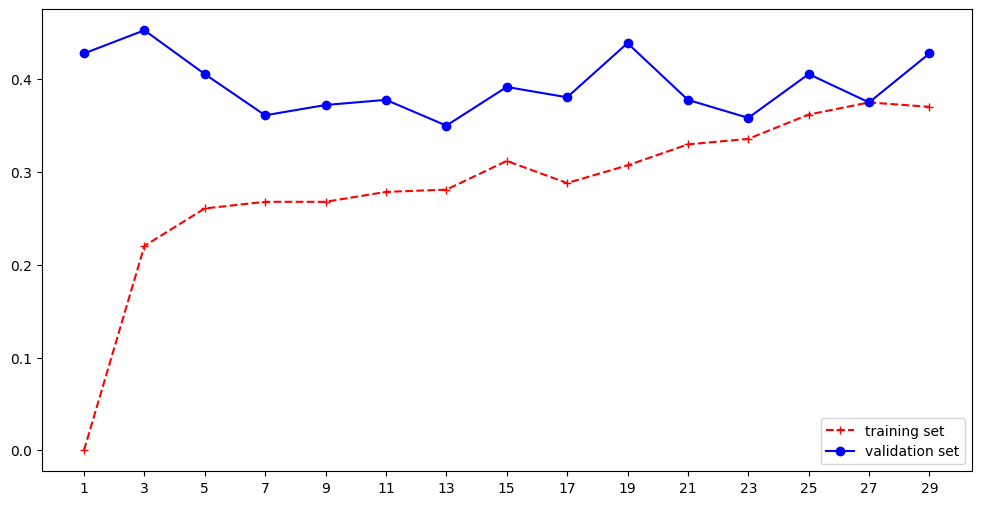

best value of k:  13


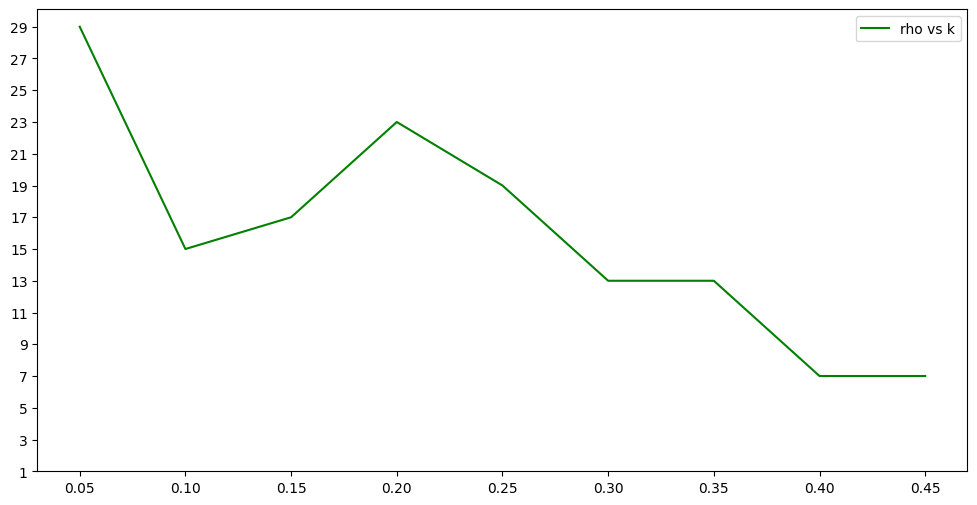

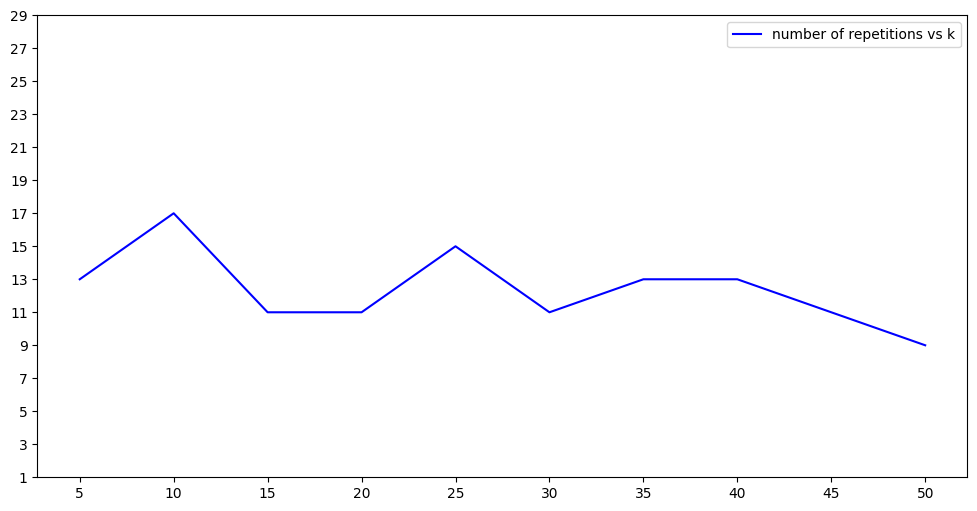

accuracy for random k(k = 23) in part-2:  0.7166666666666667
error for random k(k = 23) in part-2:  0.2833333333333333


accuracy for best k in part-3:  0.75
error for best k in part-3:  0.25


In [4]:
####################################
#Part(c): Parameter selection: What is good value for k?
####################################
#Write holdoutCVkNN() Function
def holdoutCVkNN(X_train, Y_train, k_range,numrep,rho):
    train_error = []
    validation_error = []
    for k in k_range:
        temp_val = []
        temp_trn = []
        for r in range(numrep):
            X_val = [[],[]]
            X_trn = [[],[]]
            
            val_index = random.sample(range(0,len(X_train[0])), int(rho*len(X_train[0])))
            train_index = list(set(range(0,len(X_train[0]))) - set(val_index))
            X_val[0] = [X_train[0][i] for i in val_index]
            X_val[1] = [X_train[1][i] for i in val_index]
            Y_val = [Y_train[i] for i in val_index]
            
            X_trn[0] = [X_train[0][i] for i in train_index]
            X_trn[1] = [X_train[1][i] for i in train_index]
            Y_trn = [Y_train[i] for i in train_index]
            
            Y_prd = kNNClassify(X_trn, Y_trn, X_val, k, 2)
            temp_val.append(1 - KNNAccuracy(Y_val, Y_prd))

            Y_prd = kNNClassify(X_trn, Y_trn, X_trn, k, 2)
            temp_trn.append(1 - KNNAccuracy(Y_trn, Y_prd))
        train_error.append(sum(temp_trn)/len(temp_trn))
        validation_error.append(sum(temp_val)/len(temp_val))
    return train_error, validation_error

k_range = list(range(1,30,2))
numrep = 10
rho = 0.3
train_error, valid_error = holdoutCVkNN(X_train, Y_train,k_range,numrep,rho)      
  #Iterate through range of k values
    #Iterate through number of repetations
      #Hold out rho fraction of training data in each repetition.



  #Return errors on training and validation data



#Plot training and validation errors for different values of k
plt.figure(figsize = (12,6))
plt.plot(k_range, train_error, c = "red", marker = '+', linestyle = '--', label = "training set")
plt.plot(k_range, valid_error, c = "blue", marker = 'o', label = "validation set")
plt.xticks(k_range)
plt.legend()
plt.show()

#what is the best value for k?

def bestK(valid_error, k_range):
    return (k_range[valid_error.index(min(valid_error))])

best_k = bestK(valid_error, k_range)
print("best value of k: ", best_k)



#Effect of rho and number repetations on k

rho_val = list(np.arange(0.05, 0.5, 0.05))
k_rho = []
for r in rho_val:
    t_err, v_err = holdoutCVkNN(X_train, Y_train, k_range, numrep, r)
    k_rho.append(bestK(v_err, k_range))

numrep_val = list(range(5,55,5))
k_numrep = []
for n in numrep_val:
    t_err, v_err = holdoutCVkNN(X_train, Y_train, k_range, n, 0.3)
    k_numrep.append(bestK(v_err, k_range))

plt.figure(figsize = (12, 6))
plt.plot(rho_val, k_rho, label = "rho vs k", c = "green")
plt.legend()
plt.xticks(rho_val)
plt.yticks(k_range)
plt.show()

plt.figure(figsize = (12, 6))
plt.plot(numrep_val, k_numrep, label = "number of repetitions vs k", c = "blue")
plt.legend()
plt.xticks(numrep_val)
plt.yticks(k_range)
plt.show()

#Evaluate the performance on test set with the best hyper parameters ( i.e best k ).

Y_pred = kNNClassify(X_train,Y_train, X_test,23, 2)
print("accuracy for random k(k = 23) in part-2: ", KNNAccuracy(yTest, Y_pred))
print("error for random k(k = 23) in part-2: ", 1-KNNAccuracy(yTest, Y_pred))
print("\n")
Y_pred = kNNClassify(X_train,Y_train, X_test, best_k, 2)
print("accuracy for best k in part-3: ", KNNAccuracy(yTest, Y_pred))
print("error for best k in part-3: ", 1-KNNAccuracy(yTest, Y_pred))


## Questions
#### Part-(c)

5. The best value of **k**  can be found by using the functions **holdoutCVkNN()** and **bestK**. Firstly we take out a fraction of training set and label it as validation set. Then, we iterate over a range of values of k and find the average error(averaging out errors for the number of repetitions). Next, we find the minimum error out of all the avereged out error and find the coressponding value of **k** for it to finally get the __*best value of k*__.

6. **Effect of *rho* and *numrep* on k:** We can observe the value of k to decrease when rho increases, in general. One of the reasons for this can be, when rho increases, the number of training data decreases, while validation data increases, resulting in less proper dataset and eventually leading to a fluctuating value of k. While on the other side, we cannot deduce any proper observation which indicates the trend between numrep and k. 

7. A slight improvement in accuracy can be observed. 

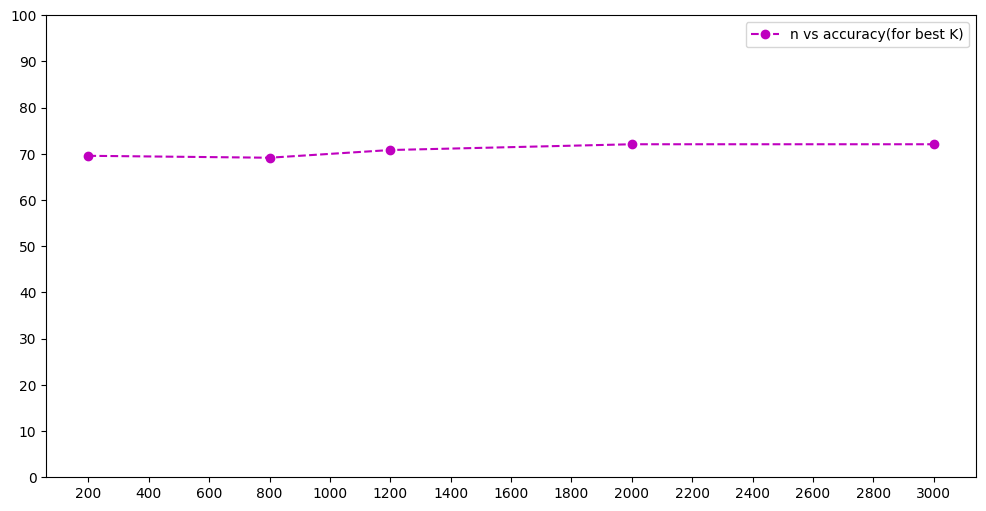

accuracy:  52.083333333333336


In [16]:
##################################
#Part(d): Influence of training data on KNN classifier
##################################
#Performance evaluation as n increases

n = [200, 800, 1200, 2000, 3000]
acc_n = []

X_train2 = [[],[]]
Y_train2 = []
X_test2 = [[],[]]
Y_test2 = []

for i in n:
    j = int(i/4)
    x, y = np.random.multivariate_normal(mean1, cov, int(i/4)).T
    X_train2[0].extend(x[:j])
    X_train2[1].extend(y[:j])
    Y_train2.extend([1 for i in range(j)]) 

    x, y = np.random.multivariate_normal(mean2, cov, int(i/4)).T
    X_train2[0].extend(x[:j])
    X_train2[1].extend(y[:j])
    Y_train2.extend([-1 for i in range(j)])

    x, y = np.random.multivariate_normal(mean3, cov, int(i/4)).T
    X_train2[0].extend(x[:j])
    X_train2[1].extend(y[:j])
    Y_train2.extend([-1 for i in range(j)])

    x, y = np.random.multivariate_normal(mean4, cov, int(i/4)).T
    X_train2[0].extend(x[:j])
    X_train2[1].extend(y[:j])
    Y_train2.extend([1 for i in range(j)])    
    
    k_range2 = list(range(int(i**0.5 - 10), int(i**0.5 + 10), 1))
    numrep2 = 10
    rho2 = 0.3
    
    k_range2 = [k_range2[i] for i in range(len(k_range2)) if (k_range2[i]%2 == 1)]
    train_error2, valid_error2 = holdoutCVkNN(X_train2,Y_train2,k_range2,numrep2,rho2)
    best_k2 = bestK(valid_error2, k_range2)
    
    Y_pred2 = kNNClassify(X_train2, Y_train2, X_test, best_k2, 2)
    acc_n.append((KNNAccuracy(yTest, Y_pred2))*100)

plt.figure(figsize=(12,6))
plt.plot(n, acc_n, ls = "--", color = "m", marker = "o", label = "n vs accuracy(for best K)")
plt.legend()
plt.xticks(list(range(200,3001,200)))
plt.yticks(list(range(0, 101, 10)))
plt.show()


#Experiments with more difficult data set.

cov2 = [[0.7, 0], [0, 0.7]]

X_train3 = [[],[]]
Y_train3 = []
X_test3 = [[], []]
Y_test3 = []

x, y = np.random.multivariate_normal(mean1, cov2, 90).T
X_train3[0].extend(x[:30])
X_train3[1].extend(y[:30])
X_test3[0].extend(x[30:])
X_test3[1].extend(y[30:])
Y_train3.extend([1 for i in range(30)])
Y_test3.extend([1 for i in range(60)])

x, y = np.random.multivariate_normal(mean2, cov2, 90).T
X_train3[0].extend(x[:30])
X_train3[1].extend(y[:30])
X_test3[0].extend(x[30:])
X_test3[1].extend(y[30:])
Y_train3.extend([-1 for i in range(30)])
Y_test3.extend([-1 for i in range(60)])

x, y = np.random.multivariate_normal(mean3, cov2, 90).T
X_train3[0].extend(x[:30])
X_train3[1].extend(y[:30])
X_test3[0].extend(x[30:])
X_test3[1].extend(y[30:])
Y_train3.extend([-1 for i in range(30)])
Y_test3.extend([-1 for i in range(60)])

x, y = np.random.multivariate_normal(mean4, cov2, 90).T
X_train3[0].extend(x[:30])
X_train3[1].extend(y[:30])
X_test3[0].extend(x[30:])
X_test3[1].extend(y[30:])
Y_train3.extend([1 for i in range(30)])
Y_test3.extend([1 for i in range(60)])

k_range3 = [i for i in range(int(120**0.5) - 10, int(120**0.5) + 10) if i%2 == 1]
numrep3 = 10
rho3 = 0.3
train_error3, valid_error3 = holdoutCVkNN(X_train3,Y_train3,k_range3,numrep3,rho3)
best_k3 = bestK(valid_error3, k_range3)
Y_pred3 = kNNClassify(X_train3, Y_train3, X_test3, best_k3, 2)
acc3 = (KNNAccuracy(Y_test3, Y_pred3))*100
print("accuracy: ", acc3)

1. The optimum range of k was chosen, after researching internet and some books, to be around sqrt(n). It was found that the error is minimized around the value of sqrt(n). So the range was taken to be the odd values in between **sqrt(n) - 10** an **sqrt(n) + 10**.

2. When the value of n is increased, the accuracy can be observed to be almost constant for the optimum k's. A minor increase can be noted at first, but it can be said to remain constant in general.

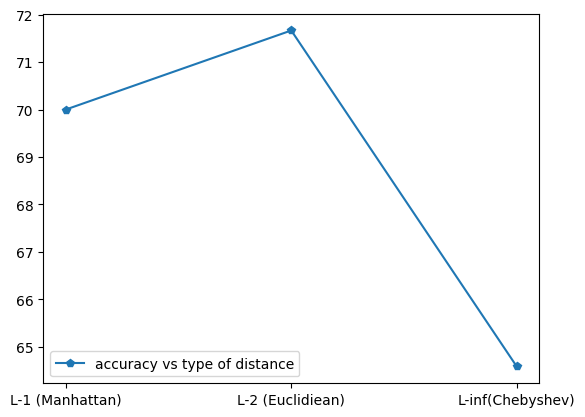

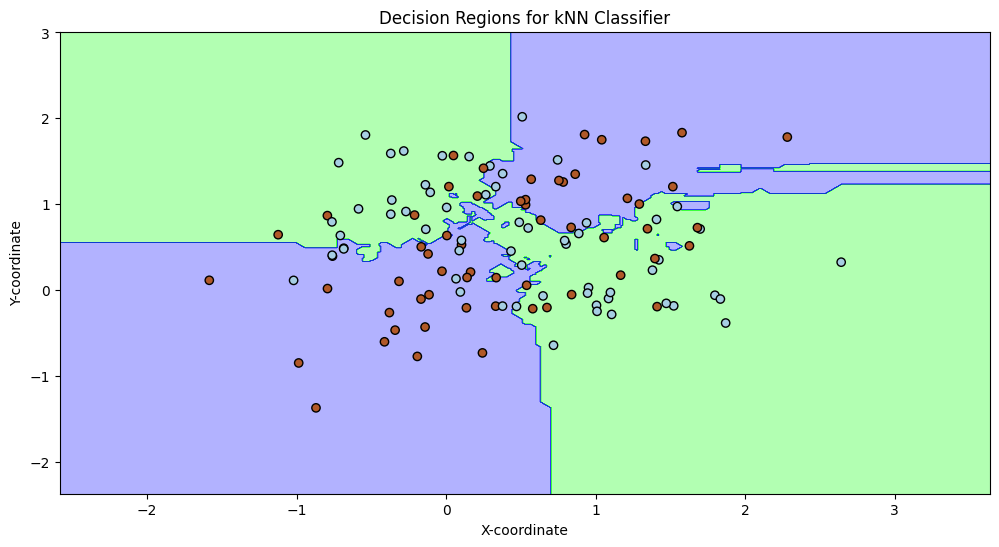

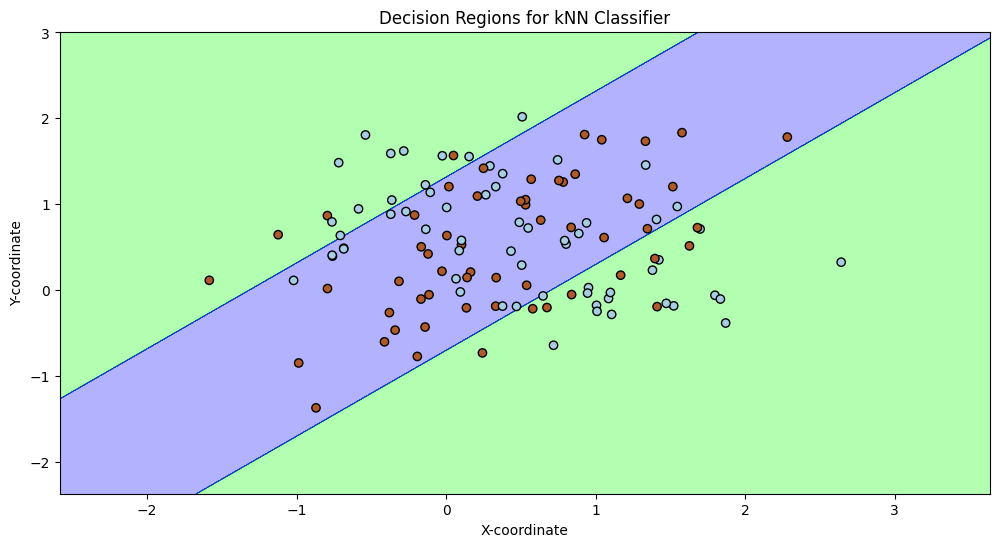

In [6]:
##################################
#Part(e): Influence of distance measure on KNN classifier
##################################
#Performance evaluation of KNN classifier with different distance measures

Y_pred_L1 = kNNClassify(X_train, Y_train, X_test, 23, 1)
Y_pred_Linf = kNNClassify(X_train, Y_train, X_test, 23, 3)

acc_L1 = (KNNAccuracy(yTest, Y_pred_L1))*100
acc_Linf = (KNNAccuracy(yTest, Y_pred_Linf))*100

distance = ["L-1 (Manhattan)", "L-2 (Euclidiean)", "L-inf(Chebyshev)"]
accuracy = [acc_L1, acc*100, acc_Linf]

plt.plot(distance, accuracy, marker = "p", label = "accuracy vs type of distance")
plt.legend()
plt.show()
#Understand the decision regions of KNN classifier with different distance measures
visualize_decision_regions(X_train, Y_train, 15, 1)
visualize_decision_regions(X_train, Y_train, 15, 3)

c:\Users\gaura\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


accuracy:  71.89999999999999
accuracy:  71.39999999999999
[[ 98   0   0   0   2   0   0   0   0   0]
 [ 13 100   1   1   1   3   0   0   0   0]
 [  5  14  66   2   0   1   1   0   2   0]
 [  6  10  13  63   3   2   1   1   1   1]
 [  0  10   6   8  76   2   0   0   0   3]
 [  8   3   3   5   2  57   3   1   1   1]
 [  5   7   3   5   0   2  74   0   0   0]
 [ 10   8   4   4   6   4   4  74   1   2]
 [  5   8   7   5   4   2   3   2  51   2]
 [ 13   4   6   5   2   3   2   8   0  55]]


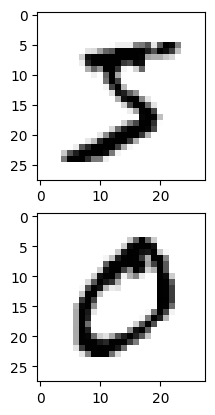

In [12]:
##################################
#Part(f): Influence of distance measure on KNN classifier
##################################

#Load MNIST data
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
images = mnist.data.to_numpy()
targets = mnist.target.to_numpy()
#Plot a few images
plt.subplot(211)
plt.imshow((images[0].reshape(28,28)), cmap=plt.cm.gray_r, interpolation='nearest')
plt.subplot(212)
plt.imshow(images[1].reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')

# images = images[:5000]
# targets = targets[:5000]

X_train_f = images[:3000]
X_val_f = images[3000:4000]
X_test_f = images[4000:5000]

Y_train_f = list(np.array(targets[:3000], dtype = int))
Y_val_f = list(np.array(targets[3000:4000], dtype = int))
Y_test_f = list(np.array(targets[4000:5000], dtype = int))

#Write 'MultiClassKNNClassify' function

def MultiClassKNNClassify(X_train_f, Y_train_f, X_test_f, k, d_num):
    pred = []
    for i in range(len(X_test_f)):
        d = []
        kIdx = []
        p = X_test_f[i]
        for j in range(len(X_train_f)):
            q = X_train_f[j]
            d.append(dis(p, q, d_num))

        for l in range(k):
            min_idx = np.argmin(d)
            kIdx.append(min_idx)
            d.pop(min_idx)
        c = [Y_train_f[i] for i in kIdx]
        pred.append(np.bincount(c).argmax())

    return pred

# #Empirically chose most suitable k and error function based on the evauation on cross-validation data
# #Evaluate the performance using different values of 'k' on the validation data and select the optimal 'k' for the test data.
k_f = list(range(3,40,6))
err_optk_f = []
for k in k_f:
    Y_pred_val_f1 = MultiClassKNNClassify(X_train_f, Y_train_f, X_val_f, k, 2)
    e1 = 1 - KNNAccuracy(Y_val_f, Y_pred_val_f1)
    err_optk_f.append(e1)
best_k_f = bestK(err_optk_f, k_f)

#Evaluation the performance using different distance measures (l1,l2, etc) on the validation data and select the optimal distance measure for test data.
err_optd_f = []
dist = [1,2,3]
for d in dist:
    Y_pred_val_f2 = MultiClassKNNClassify(X_train_f, Y_train_f, X_val_f, best_k_f, d)
    e2 = 1 - KNNAccuracy(Y_val_f, Y_pred_val_f2)
    err_optd_f.append(e2)
best_d_f = dist[err_optd_f.index(min(err_optd_f))]
# #Evaluate the performance on test data with the best hyper parameters ( k, error_func ) obtained from cross validation
Y_pred_fv = MultiClassKNNClassify(X_train_f, Y_train_f, X_val_f, best_k_f, best_d_f)
acc_fv = KNNAccuracy(Y_val_f, Y_pred_fv)*100
print("accuracy: ", acc_fv)

Y_pred_f = MultiClassKNNClassify(X_train_f, Y_train_f, X_test_f, best_k_f, best_d_f)
acc_f = KNNAccuracy(Y_test_f, Y_pred_f)*100
print("accuracy: ", acc_f)
#Create a confusion matrix for test data
def compute_confusion_matrix(true, pred):
    n_class = max(max(true), max(pred))+1
    conf_matrix = np.zeros((n_class, n_class), dtype = int)
    for true, pred in zip(true, pred):
        conf_matrix[true, pred] += 1
        
    return conf_matrix
print(compute_confusion_matrix(Y_test_f, Y_pred_f))
#     '''
#     Inputs: Ground truth labels and classifier predictions
#     Outputs: Confusion matrix
#     '''
    


#Suggest an alternative ways to improve performance





<b> Report your observations </b>
1. Write down the best accuracy on synthetic test data generated from Gaussian distribution

2. Write down the best accuracy on MNIST validation and test data.

3. Report your observations on the confusion matrix of KNN classifier on MNIST test data

Ans: 

1. Best accuracy on synthetic test data generated from Gaussian distribution: 71.9
2. Best accuracy on MNIST validation and test data: 71.4

3. The confusion matrix that you gave is a 10x10 matrix that shows the MNIST test dataset's K-nearest neighbors (KNN) classifier results. In the matrix, the genuine class is represented by each row, while the predicted class is represented by each column. Drawing from the confusion matrix, the following observations are made:

Elements in Diagonal Form (True Positives):

The number of successfully identified cases for each class is shown by the diagonal elements. For instance, the value 98 in the upper-left corner denotes that 98 instances of class 0 were correctly identified.
In general, the classifier performs better the higher the values on the diagonal.

Non-diagonal Components:

Misclassifications are represented by off-diagonal elements. For example, class 0 elements in the first row and second column (0, 1) are all 0. This means that no class 0 instances were mistakenly categorized as class 1.
Observe the items that are not on the diagonal to determine which classes are frequently confused with one another.

Unbalances in Class:

There might be more instances in some classes than others. When analyzing the confusion matrix, the class distribution must be taken into account. In contrast to the cases it accurately identified, class 0 has comparatively less misclassifications.

Total Outcome:

Measures like accuracy, precision, recall, and F1-score can be computed to evaluate the classifier's overall performance. These indicators offer a more thorough assessment of the model's effectiveness in every class.

Effect of k:

Given that you said that the range of k that was used was from 3 to 40 with a step of 6, it is possible that different choices of k will result in different confusion matrices. Analyzing how variations in k's value impact the model's performance would be fascinating.

In summary, the confusion matrix provides a thorough breakdown of the KNN classifier's performance on the MNIST test data. Consider computing more measures and perhaps experimenting with alternative values of k to maximize the model's performance in order to thoroughly assess it.

